In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv
/kaggle/input/dogs-vs-cats/test1.zip


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import random
import shutil
import zipfile

In [3]:
local_zip = '/kaggle/input/dogs-vs-cats/train.zip'
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
train_images=[]
#test_images=[]
train_path = '/kaggle/working/train/'
#test_path = '/kaggle/working/test1/'
train_images_list = os.listdir(train_path)
#test_images_list = os.listdir(test_path)
print(train_images_list[: 10])

['cat.6990.jpg', 'dog.9984.jpg', 'cat.3631.jpg', 'dog.3694.jpg', 'dog.9270.jpg', 'cat.1730.jpg', 'cat.9591.jpg', 'dog.8860.jpg', 'cat.10308.jpg', 'cat.3707.jpg']


In [5]:
try:
    os.mkdir(os.path.join(train_path , 'cats'))
    os.mkdir(os.path.join(train_path , 'dogs'))
except FileExistsError :
    print("file already exists")


In [6]:
count_cats = 0
count_dogs = 0

for a in train_images_list:
    file_name = a.split('.')
    if(file_name[0] == 'cat'):
        shutil.move(os.path.join(train_path , a) , os.path.join(train_path , 'cats/cat{}.jpg'.format(count_cats)))
        count_cats = count_cats + 1 
    else:
        shutil.move(os.path.join(train_path , a) , os.path.join(train_path , 'dogs/dog{}.jpg'.format(count_dogs)))
        count_dogs = count_dogs + 1

(438, 399, 3)


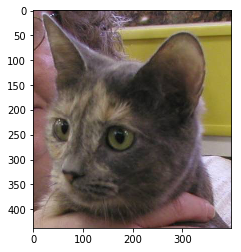

In [7]:
cat_images = []
dog_images = []

cats_img_dir = os.path.join(train_path , 'cats')
dogs_img_dir = os.path.join(train_path , 'dogs')
cat_img_list = os.listdir(cats_img_dir)
dog_img_list = os.listdir(dogs_img_dir)


for a in cat_img_list:
    cat_images.append(os.path.join(cats_img_dir , a))
for a in dog_img_list:
    dog_images.append(os.path.join(dogs_img_dir , a))

sample = plt.imread(cat_images[0])
print(sample.shape)
plt.imshow(sample)
plt.show()

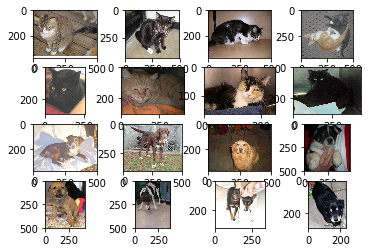

In [8]:
fig , x = plt.subplots(4,4)
for i in range (0 , 4 , 1):
    for j in range (0 , 4, 1):
        if(i==0 or i==1):
            x[i][j].imshow(plt.imread(cat_images[random.randint(0 , 12500)]))
        else:
            x[i][j].imshow(plt.imread(dog_images[random.randint(0 , 12500)]))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(
                                '/kaggle/working/train',
                                batch_size=1000,
                                class_mode='binary',
                                target_size=(150,150))

Found 25000 images belonging to 2 classes.


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [12]:
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit_generator(train_generator,
                             epochs=15,
                             steps_per_epoch=25,
                             verbose=2
                             )

Train for 25 steps
Epoch 1/15
25/25 - 81s - loss: 1.8531 - acc: 0.5067
Epoch 2/15
25/25 - 77s - loss: 0.6909 - acc: 0.5217
Epoch 3/15
25/25 - 76s - loss: 0.6809 - acc: 0.5690
Epoch 4/15
25/25 - 76s - loss: 0.6306 - acc: 0.6512
Epoch 5/15
25/25 - 75s - loss: 0.5699 - acc: 0.7016
Epoch 6/15
25/25 - 75s - loss: 0.5463 - acc: 0.7229
Epoch 7/15
25/25 - 76s - loss: 0.5210 - acc: 0.7411
Epoch 8/15
25/25 - 75s - loss: 0.5062 - acc: 0.7518
Epoch 9/15
25/25 - 76s - loss: 0.4964 - acc: 0.7579
Epoch 10/15
25/25 - 75s - loss: 0.4759 - acc: 0.7729
Epoch 11/15
25/25 - 76s - loss: 0.4596 - acc: 0.7797
Epoch 12/15
25/25 - 75s - loss: 0.4465 - acc: 0.7887
Epoch 13/15
25/25 - 75s - loss: 0.4343 - acc: 0.7981
Epoch 14/15
25/25 - 75s - loss: 0.4164 - acc: 0.8061
Epoch 15/15
25/25 - 75s - loss: 0.4033 - acc: 0.8163


In [14]:
model.save("rock-paper-scissor.h5")    